In [131]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Q2 

In [132]:
# # initialise the weights randomly 
# np.random.seed(0)
# w  = [np.random.rand(input_nodes,hidden1), np.random.rand(hidden1,hidden2),np.random.rand(hidden2,output_nodes)] 
# b = [np.random.rand(1,hidden1), np.random.rand(1,hidden2),np.random.rand(1,output_nodes)]


# 2(a) Double hidden layer




In [133]:
# with points on boundary = 0 considered as positive 
data_pos = [[0,3,1], [2,3,1],[4,3,1], [6,3,1], [3,0,1], [3,2,1],[3,4,1],[3,6,1],[0,4,1], [2,4,1],[4,4,1], [6,4,1],[0,2,1], 
       [2,2,1],[4,2,1], [6,2,1],[2,0,1],[2,2,1],[2,4,1],[2,6,1],[4,0,1], [4,2,1],[4,4,1],[4,6,1]]

data_neg = [[0,8,-1],[1,8,-1],[5,8,-1],[8,8,-1],[0,6,-1],[1,6,-1],[5,6,-1],[6,6,-1],[0,0,-1],[8,0,-1],[1,0,-1],[5,0,-1],[3,-1,-1],[9,3,-1],[-1,3,-1],[3,9,-1],[1,1,-1],[5,1,-1],[1,5,-1],[5,5,-1]]


for i in range(-3,-1):
  data_neg.append([i,0,-1])
  data_neg.append([0,i,-1])
  data_neg.append([i,2,-1])
  data_neg.append([2,i,-1])
  data_neg.append([i,4,-1])
  data_neg.append([4,i,-1])
  data_neg.append([i,6,-1])
  data_neg.append([6,i,-1])

for i in range(12,14):
  data_neg.append([i,0,-1])
  data_neg.append([i,2,-1])
  data_neg.append([i,4,-1])
  data_neg.append([i,6,-1])
  data_neg.append([6,i,-1])
  data_neg.append([4,i,-1])
  data_neg.append([2,i,-1])
  data_neg.append([0,i,-1])

for i in range(0,6):
  data_pos.append([i,3.9,1])
  data_pos.append([i,2.1,1])
  data_pos.append([i,3.5,1])
  data_pos.append([3.5,i,1])
  data_pos.append([3.9,i,1])
  data_pos.append([2.1,i,1])




In [134]:
len(data_pos), len(data_neg)

(60, 52)

In [153]:
data = data_pos + data_neg
data = np.array(data).reshape(-1,3)
print(data.shape)
np.random.shuffle(data)

X_train, X_test, y_train, y_test = train_test_split(data[:,0:2], data[:,2], stratify = data[:,2] )
print(X_train.shape)
print(X_test.shape)

(168, 3)
(126, 2)
(42, 2)


In [136]:
def classify(X_i,w,b):
  instance = X_i
  z = [] 
  y = []

  # FEED FORWARD
  temp = np.reshape(instance,(1,instance.shape[0]))
  for w_i, b_i in zip(w,b):
    z_i = np.dot(temp,w_i) + b_i
    z.append(z_i)
    y_i = np.where(z_i >=0 , 1, -1)
    y.append(y_i)
    temp = y_i
  return y[-1][0]

def perform_test(X_test,w,b):
  y_hat = []
  for index,test_x in enumerate(X_test):
    result = classify(test_x,w,b)
    y_hat.append(result)
  return y_hat

def plot_double_line_graph(X1,Y1,label1 ,X2 ,Y2,label2 ,title):
  fig = plt.figure(figsize=(7,5))
  plt.subplot(111)
  
  plt.plot(X1,Y1 ,label=label1 ,marker = "x" , color="blue")
  plt.plot(X2, Y2 , label=label2 ,marker = "x" , color="red")
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')  
  plt.legend( loc='upper left',prop={'size': 13})
  plt.show()


In [137]:
def Q2a(X_train, X_test, y_train, y_test,epochs=20):
  train_acc = []
  epoc_num = []
  test_acc = []


  #hidden layers 
  hidden_layers = 1
  # output node , hidden layer nodes , input nodes 
  output_nodes = 1 
  hidden1 = 8
  hidden2 = 2
  input_nodes = 2

  # w  = [np.empty([input_nodes,hidden1]),np.empty([hidden1,hidden2]),np.empty([hidden2,output_nodes])] 
  # for w_i in w:
  #   w_i.fill(-0.5)

  # b = [np.empty([1,hidden1]),np.empty([1,hidden2]),np.empty([1,output_nodes])]
  # for b_i in b:
  #   b_i.fill(-0.5)
  np.random.seed(4)
  w  = [np.random.rand(input_nodes,hidden1)*-1, np.random.rand(hidden1,hidden2)*-1,np.random.rand(hidden2,output_nodes)*-1] 
  b = [np.random.rand(1,hidden1)*-1, np.random.rand(1,hidden2)*-1,np.random.rand(1,output_nodes)*-1]


  # HELPER FUNCTIONS 
  def apply_adeline(layer,neuron_num,d, z, eta, w, b,inputs):
    # print("found")
    # print(w,inputs)
    for idx,row_val in enumerate(w[layer]):
      # print(row_val[neuron_num], inputs[idx], eta * (d - z))
      row_val[neuron_num] = row_val[neuron_num] + (eta * (d - z) * inputs[0][idx])
      break 

    b[layer][0][neuron_num] = b[layer][0][neuron_num] + eta * (d - z)
    print("Neuron found -----> Updated")
    # # print("w,b", w,b)

  def flip_y(layer,row,col,y):
    if y[layer][row][col] == 1:
      y[layer][row][col] = -1
    else:
      y[layer][row][col] = 1
    return y


  def feedForward(input,layer,w,b):
    z1 = []
    y1 = []

    temp = input 
    for w_i, b_i in zip(w,b):
      z_i = np.dot(temp,w_i) + b_i
      z1.append(z_i)

      y_i = np.where(z_i >=0 , 1, -1)
      y1.append(y_i)
      temp = y_i
    return y1[-1][0]


  for epoc in range(epochs):
    epoc_num.append(epoc)
    print("----------------------------------------", epoc, "-----------------------------------------")
    for index,data_x in enumerate(X_train):

      instance = data_x
      instance_label = y_train[index]
      
      z = [] 
      y = []
      inputs = []

      # FEED FORWARD
      temp = np.reshape(instance,(1,instance.shape[0]))

      for w_i, b_i in zip(w,b):
        
        inputs.append(temp)
        z_i = np.dot(temp,w_i) + b_i
        z.append(z_i)

        y_i = np.where(z_i >=0 , 1, -1)
        y.append(y_i)
        
        temp = y_i
        
        
      if y[-1][0] == instance_label:
        print("Correctly classified")
      else:
        print("Incorrectly classified")

        # fetching all z values , sorting them and storing corresponding layer number and node number 
        affine_val = []
        affine_val_idx = []

        for layer_idx,arr in enumerate(z[:-1]):
          for i,row in enumerate(arr):
            for j,col in enumerate(row):
              
              if len(affine_val) == 0:
                affine_val.append(col)
                affine_val_idx.append([layer_idx,i,j])
              else:
                for k in range(len(affine_val)):
                  
                  if k == (len(affine_val)-1) and col >= affine_val[k]:
                    affine_val.append(col)
                    affine_val_idx.append([layer_idx,i,j])
                    break

                  if col <= affine_val[k]:
                    affine_val.insert(k,col)
                    affine_val_idx.insert(k,[layer_idx,i,j])
                    break
                  
        
        for idx,z_i in enumerate(affine_val):
        
          fx_layer = affine_val_idx[idx][0]
          fx_neuron = affine_val_idx[idx][2]
      
          old_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          # print(y)
          y = flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)
          new_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          final_y = feedForward(y[affine_val_idx[idx][0]],affine_val_idx[idx][0],w[affine_val_idx[idx][0]+1:],b[affine_val_idx[idx][0]+1:])
          # print(y)
          # print(final_y, instance_label)
          if(final_y == instance_label):
            # print("DONE DONE culprit found", affine_val_idx[idx][0],affine_val_idx[idx][2])
            apply_adeline(affine_val_idx[idx][0],affine_val_idx[idx][2],new_y, z_i, 0.1, w, b,inputs[affine_val_idx[idx][0]])
            break 
            # print(w,b, "HEREEEE")
          else:
            flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)
      
    train_acc.append(accuracy_score(y_train, perform_test(X_train,w,b)))
    test_acc.append(accuracy_score(y_test, perform_test(X_test,w,b)))

  print("-----------WEIGHTS----------")
  print(w)
  print("-----------BIAS----------")
  print(b)       
  return w,b,train_acc,test_acc, epoc_num 

In [138]:
w,b,train_acc,test_acc, epoc_num = Q2a(X_train, X_test, y_train, y_test,200) 

Streaming output truncated to the last 5000 lines.
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Correctly classified
Correctly classified
Correctly classified
Correctly classified
Correctly classified
Correctly classified
Correctly classified
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Correctly classified
Incorrectly classified
Neuron found -----> Updated
Correctly classified
Correctly classified
---------------------------------------- 159 -----------------------------------------
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Correctly classified
Incorrectly classified
Neuron found ----->

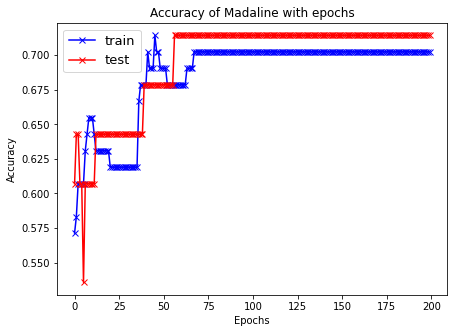

In [139]:
# GRAPHS WITH EPOC OF TRAINING AND TESTING ACCURACY 

plot_double_line_graph(epoc_num,train_acc,"train" ,epoc_num ,test_acc,"test" ,"Accuracy of Madaline with epochs")



In [140]:

print("TRAIN")
print(classification_report(y_train, perform_test(X_train,w,b)))
print("TEST")
print(classification_report(y_test, perform_test(X_test,w,b)))


TRAIN
              precision    recall  f1-score   support

        -1.0       1.00      0.36      0.53        39
         1.0       0.64      1.00      0.78        45

    accuracy                           0.70        84
   macro avg       0.82      0.68      0.66        84
weighted avg       0.81      0.70      0.66        84

TEST
              precision    recall  f1-score   support

        -1.0       1.00      0.38      0.56        13
         1.0       0.65      1.00      0.79        15

    accuracy                           0.71        28
   macro avg       0.83      0.69      0.67        28
weighted avg       0.81      0.71      0.68        28



# 2(b) Double hidden layer 

In [156]:
# with points on boundary = 0 considered as positive 
data_pos1 = [[0,3,1], [2,3,1],[4,3,1], [6,3,1], [3,0,1], [3,2,1],[3,4,1],[3,6,1],[0,4,1], [2,4,1],[4,4,1], [6,4,1],[0,2,1], 
       [2,2,1],[4,2,1], [6,2,1],[2,0,1],[2,2,1],[2,4,1],[2,6,1],[4,0,1], [4,2,1],[4,4,1],[4,6,1]]

data_neg1 = [[0,8,-1],[1,8,-1],[5,8,-1],[8,8,-1],[0,6,-1],[1,6,-1],[5,6,-1],[6,6,-1],[0,0,-1],[8,0,-1],[1,0,-1],[5,0,-1],[3,-1,-1],[9,3,-1],[-1,3,-1],[3,9,-1],[1,1,-1],[5,1,-1],[1,5,-1],[5,5,-1]]


for i in range(-3,-1):
  data_neg1.append([i,0,-1])
  data_neg1.append([0,i,-1])
  data_neg1.append([i,2,-1])
  data_neg1.append([2,i,-1])
  data_neg1.append([i,4,-1])
  data_neg1.append([4,i,-1])
  data_neg1.append([i,6,-1])
  data_neg1.append([6,i,-1])

for i in range(12,14):
  data_neg1.append([i,0,-1])
  data_neg1.append([i,2,-1])
  data_neg1.append([i,4,-1])
  data_neg1.append([i,6,-1])
  data_neg1.append([6,i,-1])
  data_neg1.append([4,i,-1])
  data_neg1.append([2,i,-1])
  data_neg1.append([0,i,-1])

for i in range(0,7,2):
  data_pos1.append([i,3.9,1])
  data_pos1.append([i,2.1,1])
  data_pos1.append([i,3.5,1])
  data_pos1.append([3.5,i,1])
  data_pos1.append([3.9,i,1])
  data_pos1.append([2.1,i,1])


In [158]:
data1 = data_pos1 + data_neg1
data1 = np.array(data1).reshape(-1,3)
print(data1.shape)
np.random.shuffle(data1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(data1[:,0:2], data1[:,2], stratify = data1[:,2] )
np.shape(X_test1)

(100, 3)


(25, 2)

In [159]:
def classify(X_i,w,b):
  instance = X_i
  z = [] 
  y = []

  # FEED FORWARD
  temp = np.reshape(instance,(1,instance.shape[0]))
  for w_i, b_i in zip(w,b):
    z_i = np.dot(temp,w_i) + b_i
    z.append(z_i)
    y_i = np.where(z_i >=0 , 1, -1)
    y.append(y_i)
    temp = y_i
  return y[-1][0]

def perform_test(X_test,w,b):
  y_hat = []
  for index,test_x in enumerate(X_test):
    result = classify(test_x,w,b)
    y_hat.append(result)
  return y_hat

def plot_double_line_graph(X1,Y1,label1 ,X2 ,Y2,label2 ,title):
  fig = plt.figure(figsize=(7,5))
  plt.subplot(111)
  
  plt.plot(X1,Y1 ,label=label1 ,marker = "x" , color="blue")
  plt.plot(X2, Y2 , label=label2 ,marker = "x" , color="red")
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')  
  plt.legend( loc='upper left',prop={'size': 13})
  plt.show()


In [166]:
def Q2b(X_train, X_test, y_train, y_test,epochs=20):
  train_acc = []
  epoc_num = []
  test_acc = []


  #hidden layers 
  hidden_layers = 1
  # output node , hidden layer nodes , input nodes 
  output_nodes = 1 
  hidden1 = 8
  hidden2 = 4
  input_nodes = 2

  w  = [np.empty([input_nodes,hidden1]),np.empty([hidden1,hidden2]),np.empty([hidden2,output_nodes])] 
  for w_i in w:
    w_i.fill(0.5)

  b = [np.empty([1,hidden1]),np.empty([1,hidden2]),np.empty([1,output_nodes])]
  for b_i in b:
    b_i.fill(0.5)
  # np.random.seed(4)
  # w  = [np.random.rand(input_nodes,hidden1)*1, np.random.rand(hidden1,hidden2)*1,np.random.rand(hidden2,output_nodes)*-1] 
  # b = [np.random.rand(1,hidden1)*-1, np.random.rand(1,hidden2)*-1,np.random.rand(1,output_nodes)*-1]


  # HELPER FUNCTIONS 
  def apply_adeline(layer,neuron_num,d, z, eta, w, b,inputs):
    # print("found")
    # print(w,inputs)
    for idx,row_val in enumerate(w[layer]):
      # print(row_val[neuron_num], inputs[idx], eta * (d - z))
      row_val[neuron_num] = row_val[neuron_num] + (eta * (d - z) * inputs[0][idx])
      break 

    b[layer][0][neuron_num] = b[layer][0][neuron_num] + eta * (d - z)
    print("Neuron found -----> Updated")
    # # print("w,b", w,b)

  def flip_y(layer,row,col,y):
    if y[layer][row][col] == 1:
      y[layer][row][col] = -1
    else:
      y[layer][row][col] = 1
    return y


  def feedForward(input,layer,w,b):
    z1 = []
    y1 = []

    temp = input 
    for w_i, b_i in zip(w,b):
      z_i = np.dot(temp,w_i) + b_i
      z1.append(z_i)

      y_i = np.where(z_i >=0 , 1, -1)
      y1.append(y_i)
      temp = y_i
    return y1[-1][0]


  for epoc in range(epochs):
    epoc_num.append(epoc)
    print("----------------------------------------", epoc, "-----------------------------------------")
    for index,data_x in enumerate(X_train):

      instance = data_x
      instance_label = y_train[index]
      
      z = [] 
      y = []
      inputs = []

      # FEED FORWARD
      temp = np.reshape(instance,(1,instance.shape[0]))

      for w_i, b_i in zip(w,b):
        
        inputs.append(temp)
        z_i = np.dot(temp,w_i) + b_i
        z.append(z_i)

        y_i = np.where(z_i >=0 , 1, -1)
        y.append(y_i)
        
        temp = y_i
        
        
      if y[-1][0] == instance_label:
        print("Correctly classified")
      else:
        print("Incorrectly classified")

        # fetching all z values , sorting them and storing corresponding layer number and node number 
        affine_val = []
        affine_val_idx = []

        for layer_idx,arr in enumerate(z[:-1]):
          for i,row in enumerate(arr):
            for j,col in enumerate(row):
              
              if len(affine_val) == 0:
                affine_val.append(col)
                affine_val_idx.append([layer_idx,i,j])
              else:
                for k in range(len(affine_val)):
                  
                  if k == (len(affine_val)-1) and col >= affine_val[k]:
                    affine_val.append(col)
                    affine_val_idx.append([layer_idx,i,j])
                    break

                  if col <= affine_val[k]:
                    affine_val.insert(k,col)
                    affine_val_idx.insert(k,[layer_idx,i,j])
                    break
                  
        
        for idx,z_i in enumerate(affine_val):
        
          fx_layer = affine_val_idx[idx][0]
          fx_neuron = affine_val_idx[idx][2]
      
          old_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          # print(y)
          y = flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)
          new_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          final_y = feedForward(y[affine_val_idx[idx][0]],affine_val_idx[idx][0],w[affine_val_idx[idx][0]+1:],b[affine_val_idx[idx][0]+1:])
          # print(y)
          # print(final_y, instance_label)
          if(final_y == instance_label):
            # print("DONE DONE culprit found", affine_val_idx[idx][0],affine_val_idx[idx][2])
            apply_adeline(affine_val_idx[idx][0],affine_val_idx[idx][2],new_y, z_i, 0.1, w, b,inputs[affine_val_idx[idx][0]])
            break 
            # print(w,b, "HEREEEE")
          else:
            flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)
      
    train_acc.append(accuracy_score(y_train, perform_test(X_train,w,b)))
    test_acc.append(accuracy_score(y_test, perform_test(X_test,w,b)))

  print("-----------WEIGHTS----------")
  print(w)
  print("-----------BIAS----------")
  print(b)       
  return w,b,train_acc,test_acc, epoc_num 

Streaming output truncated to the last 5000 lines.
Correctly classified
Correctly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Incorrectly classified
Correctly classified
Correctly classified
Incorrectly classified
Incorrectly classified
Incorrectly classified
Correctly classified
Correctly classified
Correctly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Incorrectly classified
Incorrectly classified
Incorrectly classified
Incorrectly classified
Incorrectly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Correctly classified
Incorrectly classified
Correctly classified
Correctly classified
Incorrectly classified
Incorrectly classified
Correctly classifie

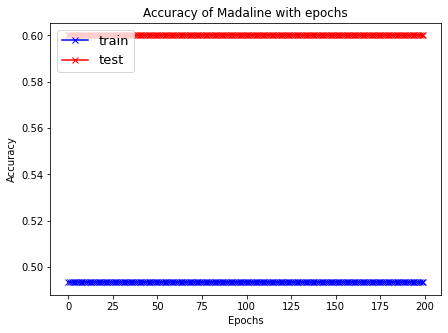

TRAIN
              precision    recall  f1-score   support

        -1.0       1.00      0.06      0.12        63
         1.0       0.52      1.00      0.68        63

    accuracy                           0.53       126
   macro avg       0.76      0.53      0.40       126
weighted avg       0.76      0.53      0.40       126

TEST
              precision    recall  f1-score   support

        -1.0       1.00      0.19      0.32        21
         1.0       0.55      1.00      0.71        21

    accuracy                           0.60        42
   macro avg       0.78      0.60      0.52        42
weighted avg       0.78      0.60      0.52        42



In [167]:
w,b,train_acc,test_acc, epoc_num = Q2b(X_train1, X_test1, y_train1, y_test1,200)
plot_double_line_graph(epoc_num,train_acc,"train" ,epoc_num ,test_acc,"test" ,"Accuracy of Madaline with epochs")

print("TRAIN")
print(classification_report(y_train, perform_test(X_train,w,b)))
print("TEST")
print(classification_report(y_test, perform_test(X_test,w,b)))


# XOR 

In [146]:
def XOR_Madaline_implementation():
  #hidden layers 
  hidden_layers = 1
  # output node , hidden layer nodes , input nodes 
  output_nodes = 1 
  hidden1 = 2
  input_nodes = 2

  # initialise the weights 
  np.random.seed(0)
  w  = [np.empty([input_nodes,hidden1]),np.empty([hidden1,output_nodes])] 
  for w_i in w:
    w_i.fill(0.5)

  b = [np.empty([1,hidden1]),np.empty([1,output_nodes])]
  for b_i in b:
    b_i.fill(-0.5)

  # HELPER FUNCTIONS 
  def apply_adeline(layer,neuron_num,d, z, eta, w, b,inputs):
    # print("w,b", w,b)
    for idx,row_val in enumerate(w[layer]):
      row_val[neuron_num] = row_val[neuron_num] + eta * (d - z) * inputs[idx]

    b[layer][0][neuron_num] = b[layer][0][neuron_num] + eta * (d - z)
    print("Neuron found -----> Updated")
    # print("w,b", w,b)

  def flip_y(layer,row,col,y):
    if y[layer][row][col] == 1:
      y[layer][row][col] = -1
    else:
      y[layer][row][col] = 1
    return y


  def feedForward(input,layer,w,b):
    z1 = []
    y1 = []

    temp = input 
    
    for w_i, b_i in zip(w,b):
      z_i = np.dot(temp,w_i) + b_i
      z1.append(z_i)

      y_i = np.where(z_i >=0 , 1, -1)
      y1.append(y_i)

      temp = y_i
    return y1[-1][0]


  data1 = [[0,0,-1],[0,1,1],[1,0,1],[1,1,-1]]
  data1 = np.array(data1)
  epochs = 20

  for epoc in range(epochs):
    print("----------------------------------------", epoc, "-----------------------------------------")
    for index,data_x in enumerate(data1):

      instance = np.array([data_x[0],data_x[1]])
      instance_label = data_x[2]
      
      z = [] 
      y = []
      inputs = []

      # FEED FORWARD
      temp = instance

      for w_i, b_i in zip(w,b):
        
        inputs.append(temp)
        z_i = np.dot(temp,w_i) + b_i
        z.append(z_i)

        y_i = np.where(z_i >=0 , 1, -1)
        y.append(y_i)
        
        temp = y_i
        
        
      if y[-1][0] == instance_label:
        print("Correctly classified")
      else:
        print("Incorrectly classified")

        # fetching all z values , sorting them and storing corresponding layer number and node number 
        affine_val = []
        affine_val_idx = []

        for layer_idx,arr in enumerate(z[:-1]):
          for i,row in enumerate(arr):
            for j,col in enumerate(row):
              
              if len(affine_val) == 0:
                affine_val.append(col)
                affine_val_idx.append([layer_idx,i,j])
              else:
                for k in range(len(affine_val)):
                  
                  if k == (len(affine_val)-1) and col >= affine_val[k]:
                    affine_val.append(col)
                    affine_val_idx.append([layer_idx,i,j])
                    break

                  if col <= affine_val[k]:
                    affine_val.insert(k,col)
                    affine_val_idx.insert(k,[layer_idx,i,j])
                    break
                  


        for idx,z_i in enumerate(affine_val):
        
          fx_layer = affine_val_idx[idx][0]
          fx_neuron = affine_val_idx[idx][2]
      
          old_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          # print(y)
          y = flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)
          new_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          final_y = feedForward(y[affine_val_idx[idx][0]],affine_val_idx[idx][0],w[affine_val_idx[idx][0]+1:],b[affine_val_idx[idx][0]+1:])
          # print(y)
          # print(final_y, instance_label)
          if(final_y == instance_label):
            # print("DONE DONE culprit found", affine_val_idx[idx][0],affine_val_idx[idx][2])
            apply_adeline(affine_val_idx[idx][0],affine_val_idx[idx][2],new_y, z_i, 0.1, w, b,inputs[affine_val_idx[idx][0]])
            break 
            # print(w,b, "HEREEEE")
          else:
            flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)


  print("-----------WEIGHTS----------")
  print(w)
  print("-----------BIAS----------")
  print(b)       



In [147]:
XOR_Madaline_implementation()

---------------------------------------- 0 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Incorrectly classified
Neuron found -----> Updated
---------------------------------------- 1 -----------------------------------------
Correctly classified
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
---------------------------------------- 2 -----------------------------------------
Correctly classified
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
---------------------------------------- 3 -----------------------------------------
Correctly classified
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
------------------------

#AND 

In [148]:
def AND_Madaline_implementation():
  #hidden layers 
  hidden_layers = 1
  # output node , hidden layer nodes , input nodes 
  output_nodes = 1 
  hidden1 = 2
  input_nodes = 2

  # initialise the weights 
  np.random.seed(0)
  w  = [np.empty([input_nodes,hidden1]),np.empty([hidden1,output_nodes])] 
  for w_i in w:
    w_i.fill(0.7)

  b = [np.empty([1,hidden1]),np.empty([1,output_nodes])]
  for b_i in b:
    b_i.fill(-0.2)

  # HELPER FUNCTIONS 
  def apply_adeline(layer,neuron_num,d, z, eta, w, b,inputs):
    # print("w,b", w,b)
    for idx,row_val in enumerate(w[layer]):
      
      row_val[neuron_num] = row_val[neuron_num] + eta * (d - z) * inputs[idx]

    b[layer][0][neuron_num] = b[layer][0][neuron_num] + eta * (d - z)
    print("Neuron found -----> Updated")
    # print("w,b", w,b)

  def flip_y(layer,row,col,y):
    if y[layer][row][col] == 1:
      y[layer][row][col] = -1
    else:
      y[layer][row][col] = 1
    return y


  def feedForward(input,layer,w,b):
    z1 = []
    y1 = []

    temp = input 
    
    for w_i, b_i in zip(w,b):
      z_i = np.dot(temp,w_i) + b_i
      z1.append(z_i)

      y_i = np.where(z_i >=0 , 1, -1)
      y1.append(y_i)

      temp = y_i
    return y1[-1][0]


  data1 = [[0,0,-1],[0,1,-1],[1,0,-1],[1,1,1]]
  data1 = np.array(data1)
  epochs = 5

  for epoc in range(epochs):
    print("----------------------------------------", epoc, "-----------------------------------------")
    for index,data_x in enumerate(data1):

      instance = np.array([data_x[0],data_x[1]])
      instance_label = data_x[2]
      
      z = [] 
      y = []
      inputs = []

      # FEED FORWARD
      temp = instance

      for w_i, b_i in zip(w,b):
        
        inputs.append(temp)
        z_i = np.dot(temp,w_i) + b_i
        z.append(z_i)

        y_i = np.where(z_i >=0 , 1, -1)
        y.append(y_i)
        
        temp = y_i
        
        
      if y[-1][0] == instance_label:
        print("Correctly classified")
      else:
        print("Incorrectly classified")

        # fetching all z values , sorting them and storing corresponding layer number and node number 
        affine_val = []
        affine_val_idx = []

        for layer_idx,arr in enumerate(z[:-1]):
          for i,row in enumerate(arr):
            for j,col in enumerate(row):
              
              if len(affine_val) == 0:
                affine_val.append(col)
                affine_val_idx.append([layer_idx,i,j])
              else:
                for k in range(len(affine_val)):
                  
                  if k == (len(affine_val)-1) and col >= affine_val[k]:
                    affine_val.append(col)
                    affine_val_idx.append([layer_idx,i,j])
                    break

                  if col <= affine_val[k]:
                    affine_val.insert(k,col)
                    affine_val_idx.insert(k,[layer_idx,i,j])
                    break
                  


        for idx,z_i in enumerate(affine_val):
        
          fx_layer = affine_val_idx[idx][0]
          fx_neuron = affine_val_idx[idx][2]
      
          old_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          # print(y)
          y = flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)
          new_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          final_y = feedForward(y[affine_val_idx[idx][0]],affine_val_idx[idx][0],w[affine_val_idx[idx][0]+1:],b[affine_val_idx[idx][0]+1:])
          # print(y)
          # print(final_y, instance_label)
          if(final_y == instance_label):
            # print("DONE DONE culprit found", affine_val_idx[idx][0],affine_val_idx[idx][2])
            apply_adeline(affine_val_idx[idx][0],affine_val_idx[idx][2],new_y, z_i, 0.1, w, b,inputs[affine_val_idx[idx][0]])
            break 
            # print(w,b, "HEREEEE")
          else:
            flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)


  print("-----------WEIGHTS----------")
  print(w)
  print("-----------BIAS----------")
  print(b)       



In [149]:
AND_Madaline_implementation()

---------------------------------------- 0 -----------------------------------------
Correctly classified
Incorrectly classified
Neuron found -----> Updated
Incorrectly classified
Neuron found -----> Updated
Correctly classified
---------------------------------------- 1 -----------------------------------------
Correctly classified
Incorrectly classified
Neuron found -----> Updated
Correctly classified
Correctly classified
---------------------------------------- 2 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Correctly classified
---------------------------------------- 3 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Correctly classified
---------------------------------------- 4 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Correctly classified
-----------WEIGHTS----------
[array([[0.565 , 0.7   ],
       [0.

# OR 

In [150]:
def OR_Madaline_implementation():
  #hidden layers 
  hidden_layers = 1
  # output node , hidden layer nodes , input nodes 
  output_nodes = 1 
  hidden1 = 2
  input_nodes = 2

  # initialise the weights 
  np.random.seed(0)
  w  = [np.empty([input_nodes,hidden1]),np.empty([hidden1,output_nodes])] 
  for w_i in w:
    w_i.fill(-0.2)

  b = [np.empty([1,hidden1]),np.empty([1,output_nodes])]
  for b_i in b:
    b_i.fill(-0.02)

  # HELPER FUNCTIONS 
  def apply_adeline(layer,neuron_num,d, z, eta, w, b,inputs):
    # print("w,b", w,b)
    for idx,row_val in enumerate(w[layer]):
      
      row_val[neuron_num] = row_val[neuron_num] + eta * (d - z) * inputs[idx]

    b[layer][0][neuron_num] = b[layer][0][neuron_num] + eta * (d - z)
    print("Neuron found -----> Updated")
    # print("w,b", w,b)

  def flip_y(layer,row,col,y):
    if y[layer][row][col] == 1:
      y[layer][row][col] = -1
    else:
      y[layer][row][col] = 1
    return y


  def feedForward(input,layer,w,b):
    z1 = []
    y1 = []

    temp = input 
    
    for w_i, b_i in zip(w,b):
      z_i = np.dot(temp,w_i) + b_i
      z1.append(z_i)

      y_i = np.where(z_i >=0 , 1, -1)
      y1.append(y_i)

      temp = y_i
    return y1[-1][0]


  data1 = [[0,0,-1],[0,1,1],[1,0,1],[1,1,1]]
  data1 = np.array(data1)
  epochs = 5

  for epoc in range(epochs):
    print("----------------------------------------", epoc, "-----------------------------------------")
    for index,data_x in enumerate(data1):

      instance = np.array([data_x[0],data_x[1]])
      instance_label = data_x[2]
      
      z = [] 
      y = []
      inputs = []

      # FEED FORWARD
      temp = instance

      for w_i, b_i in zip(w,b):
        
        inputs.append(temp)
        z_i = np.dot(temp,w_i) + b_i
        z.append(z_i)

        y_i = np.where(z_i >=0 , 1, -1)
        y.append(y_i)
        
        temp = y_i
        
        
      if y[-1][0] == instance_label:
        print("Correctly classified")
      else:
        print("Incorrectly classified")

        # fetching all z values , sorting them and storing corresponding layer number and node number 
        affine_val = []
        affine_val_idx = []

        for layer_idx,arr in enumerate(z[:-1]):
          for i,row in enumerate(arr):
            for j,col in enumerate(row):
              
              if len(affine_val) == 0:
                affine_val.append(col)
                affine_val_idx.append([layer_idx,i,j])
              else:
                for k in range(len(affine_val)):
                  
                  if k == (len(affine_val)-1) and col >= affine_val[k]:
                    affine_val.append(col)
                    affine_val_idx.append([layer_idx,i,j])
                    break

                  if col <= affine_val[k]:
                    affine_val.insert(k,col)
                    affine_val_idx.insert(k,[layer_idx,i,j])
                    break
                  


        for idx,z_i in enumerate(affine_val):
        
          fx_layer = affine_val_idx[idx][0]
          fx_neuron = affine_val_idx[idx][2]
      
          old_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          # print(y)
          y = flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)
          new_y = y[affine_val_idx[idx][0]][affine_val_idx[idx][1]][affine_val_idx[idx][2]]
          final_y = feedForward(y[affine_val_idx[idx][0]],affine_val_idx[idx][0],w[affine_val_idx[idx][0]+1:],b[affine_val_idx[idx][0]+1:])
          # print(y)
          # print(final_y, instance_label)
          if(final_y == instance_label):
            # print("DONE DONE culprit found", affine_val_idx[idx][0],affine_val_idx[idx][2])
            apply_adeline(affine_val_idx[idx][0],affine_val_idx[idx][2],new_y, z_i, 0.1, w, b,inputs[affine_val_idx[idx][0]])
            break 
            # print(w,b, "HEREEEE")
          else:
            flip_y(affine_val_idx[idx][0],affine_val_idx[idx][1],affine_val_idx[idx][2],y)


  print("-----------WEIGHTS----------")
  print(w)
  print("-----------BIAS----------")
  print(b)       



In [151]:
OR_Madaline_implementation()

---------------------------------------- 0 -----------------------------------------
Incorrectly classified
Neuron found -----> Updated
Correctly classified
Correctly classified
Correctly classified
---------------------------------------- 1 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Correctly classified
---------------------------------------- 2 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Correctly classified
---------------------------------------- 3 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Correctly classified
---------------------------------------- 4 -----------------------------------------
Correctly classified
Correctly classified
Correctly classified
Correctly classified
-----------WEIGHTS----------
[array([[-0.2, -0.2],
       [-0.2, -0.2]]), array([[-0.2],
       [-0.2]])]
-----------BIAS----